<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/notebooks/2021_0507_3mnists_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習実習用ファイル

* [線形回帰](#linreg)
* [主成分分析](#pca)
* [tSNE](#tSNE)
* [ロジスティック回帰](#logistic)

In [3]:
import numpy as np
import sys
import requests

mnist_urls = {
    #http://yann.lecun.com/exdb/mnist/
    'Xtrain': 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
    'Ytrain': 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
    'Xtest': 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
    'Ytest':'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
}

fashionmnist_urls = {
    #https://github.com/zalandoresearch/fashion-mnist
    'Xtest': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
    'Ytest': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
    'Xtrain': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
    'Ytrain': 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'
}

kmnist_urls = {
    #http://codh.rois.ac.jp/kmnist/
    'Xtrain': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz',
    'Ytrain': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz',
    'Xtest': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz',
    'Ytest': 'http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz'
}
 

def download_mnist(dataset):
    #上で定義したデータセットの情報を元にデータをダウンロードする
    for name, url in dataset.items():
        fname = url.split('/')[-1]
        print(url, fname)
        r = requests.get(url, timeout=35) #timeout=None はサーバからの応答が遅い場合永遠に待ち続ける
        with open(fname, 'wb') as f:
            f.write(r.content)


In [18]:
#データを変更して，繰り返し実行する際には，次行行頭の # を削除して，上のセルを再実行する必要があります
#!rm *.gz
#!ls -l *.gz*

mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fashionmnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat' , \
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
kmnist_labels = ['お', 'き', 'す', 'つ', 'な', 'は', 'ま', 'や', 'れ', 'を']
# '0,U+304A,お', '1,U+304D,き', '2,U+3059,す', '3,U+3064,つ', '4,U+306A,な', 
# '5,U+306F,は', '6,U+307E,ま', '7,U+3084,や', '8,U+308C,れ', '9,U+3092,を'

labels = mnist_labels
labels = fashionmnist_labels
labels = kmnist_labels

#以下の 3 つのデータセットのうち 1 つを選んで実習してみましょう
dataset = mnist_urls
#dataset = fashionmnist_urls
dataset = kmnist_urls

labels = mnist_labels
#labels = fashionmnist_labels
labels = kmnist_labels

download_mnist(dataset)

http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-images-idx3-ubyte.gz train-images-idx3-ubyte.gz
http://codh.rois.ac.jp/kmnist/dataset/kmnist/train-labels-idx1-ubyte.gz train-labels-idx1-ubyte.gz
http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-images-idx3-ubyte.gz t10k-images-idx3-ubyte.gz
http://codh.rois.ac.jp/kmnist/dataset/kmnist/t10k-labels-idx1-ubyte.gz t10k-labels-idx1-ubyte.gz


In [19]:
!gls -lt *.gz

-rw-r--r-- 1 _asakawa staff     5120 May 19 21:47 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 _asakawa staff  3041136 May 19 21:47 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 _asakawa staff    29497 May 19 21:47 train-labels-idx1-ubyte.gz
-rw-r--r-- 1 _asakawa staff 18165135 May 19 21:47 train-images-idx3-ubyte.gz


In [20]:
def load_mnist(path, kind='train'):
    """ダウンロードしたデータを読み込む関数"""
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [21]:
import IPython
isColab = 'google.colab' in str(IPython.get_ipython())
if isColab:
    !pip install japanize_matplotlib

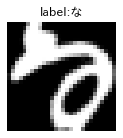

In [22]:
#データの表示
import matplotlib.pyplot as plt
import japanize_matplotlib
X_train, Y_train = load_mnist('.', kind='train')
X_test, Y_test = load_mnist('.', kind='t10k')

#次行の数字を変更して実施してください。ただし数字の範囲は 0 から 59999 までです
No = 5001
plt.figure(figsize=(2,2))    #表示する縦横の大きさ，単位はインチ
plt.title('label:{}'.format(labels[Y_train[No]]))
plt.axis(False)
plt.imshow(X_train[No].reshape(28,28), cmap='gray')
plt.show()

# 1. <a name="linreg">線形回帰</a>

In [23]:
import numpy as np
X = np.zeros_like(X_train)
X = X_train/255
X_t = np.zeros_like(X_test)
X_t = X_test/255

y = None

In [24]:
#ここから先は単純な重回帰の実行です
import numpy as np

#簡単のためデータ数を最初の N 個に制限します。
N = 12000
x = X_train[:N]
y = Y_train[:N]
x = X[:N]

y_ = np.zeros((N,10))
y_[np.arange(len(y)),y] = 1             # 教師データ
bias = np.ones((x.shape[0],1))          # 線形回帰 y = w x + b の b すなわちバイアス項の定義
X1 = np.concatenate((x, bias), axis=1)  # x と b とを連接して一つの行列にする
XtX = np.dot(X1.T, X1)                  # $X^t X$
XtX_inv = np.linalg.inv(XtX)            # 逆行列 $(X^t X)^{-1}$ の計算
w = np.dot(np.dot(XtX_inv, X1.T), y_)
print(f'定義した重み係数行列のサイズ: {w.shape}')

定義した重み係数行列のサイズ: (785, 10)


In [25]:
y_ = np.zeros((y.shape[0],10))  #教師データの作成の準備
y_[np.arange(len(y)),y] = 1     #教師データ

#y_hat = np.dot(w, y_)          #線形回帰の実施
y_hat = np.dot(X1, w)           #線形回帰の実施

In [26]:
#回帰分析の結果，精度の印字
teach = np.argmax(y_,axis=1)    #教師信号を teach とする。この処理は冗長です
pred  = np.argmax(y_hat,axis=1) #予測値を pred とする
print(f'訓練データの精度: {((teach == pred) * 1).sum() / N * 100:.3f} %')

訓練データの精度: 80.042 %


In [27]:
#検証データによる評価

y = Y_test
y_ = np.zeros((y.shape[0],10))  #教師データの作成の準備
y_[np.arange(len(y_)),Y_test] = 1     #教師データ

x = X_test
bias = np.ones((x.shape[0],1))          # 線形回帰 y = w x + b の b すなわちバイアス項の定義
X1 = np.concatenate((x, bias), axis=1)  # x と b とを連接して一つの行列にする

#print(w.shape)
#sys.exit() gb 
y_hat = np.dot(X1, w)
teach = np.argmax(y_, axis=1)
pred = np.argmax(y_hat, axis=1)
print(f'テストデータの精度: {((teach == pred) * 1).sum() / len(Y_test) * 100:.3f} %')

テストデータの精度: 52.140 %


# 2. <a name='pca'>主成分分析</a>

In [28]:
#視覚化のためのライブラリを読み込む
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

Text(0, 0.5, '第二主成分')

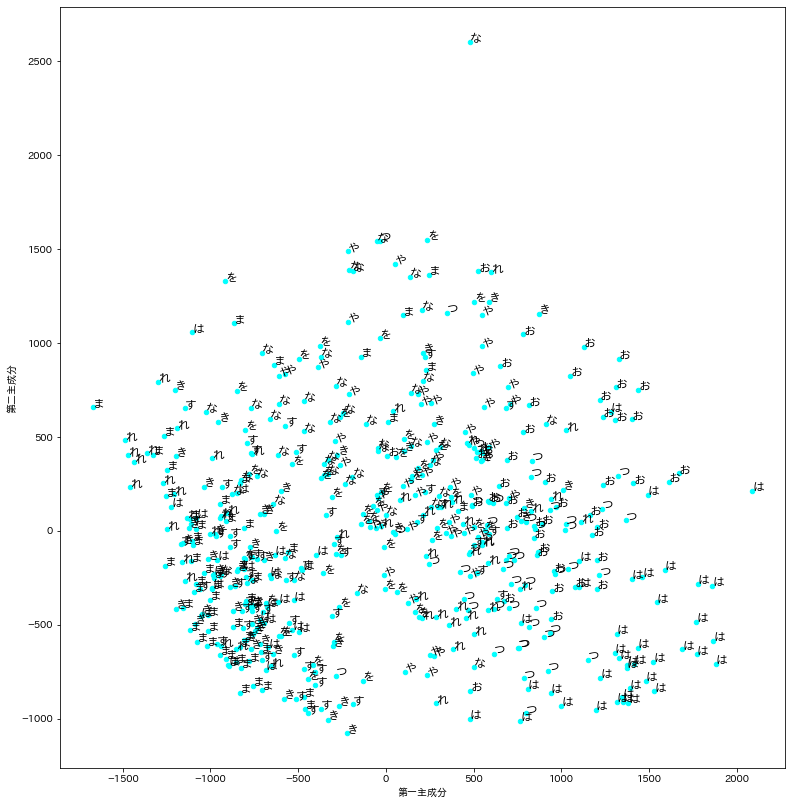

In [29]:
pca = PCA(n_components=2)
N = 500
x = X_train[:N]
y = Y_train[:N]

label = [labels[y[i]] for i in range(len(y))]
pca_results = pca.fit_transform(x)
pca1, pca2 = pca_results[:,0], pca_results[:,1] 
fig, ax = plt.subplots(figsize=(13,14))  
ax.scatter(pca1, pca2, s=20, color='cyan')
for i, l in enumerate(label):
    ax.annotate(l, (pca1[i], pca2[i]), fontsize=12)
ax.set_xlabel('第一主成分')
ax.set_ylabel('第二主成分')


# 3. <a name="tSNE">tSNE</a>

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 'tSNE 2')

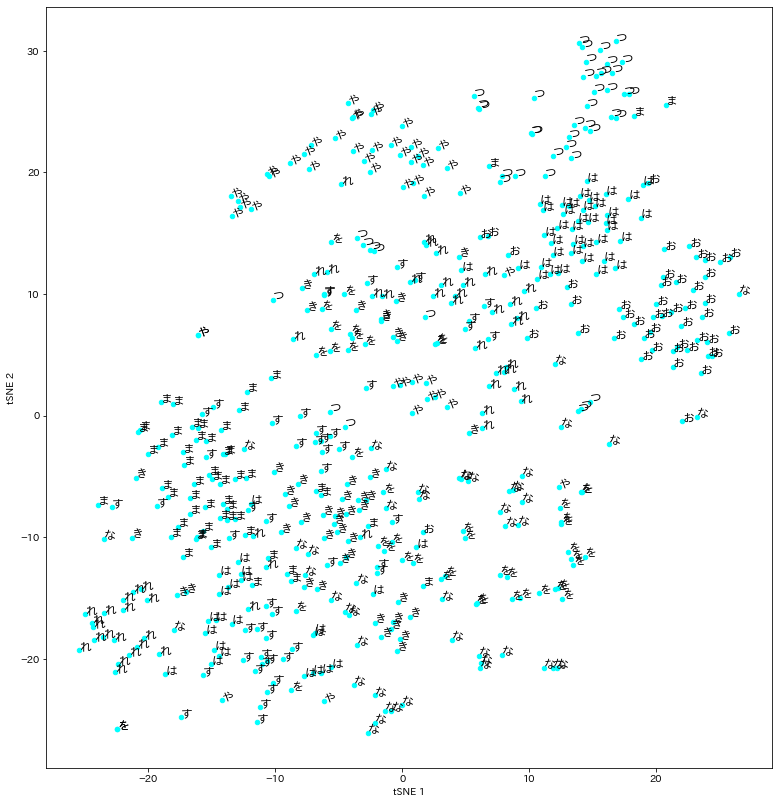

In [30]:
tsne_results = TSNE(n_components=2).fit_transform(x)
tsne1, tsne2 = tsne_results[:,0], tsne_results[:,1]
label = [labels[y[i]] for i in range(len(y))]
fig, ax = plt.subplots(figsize=(13,14))
ax.scatter(tsne1, tsne2, s=20, color='cyan')
for i, l in enumerate(label):
    ax.annotate(l, (tsne1[i], tsne2[i]),fontsize=12)
ax.set_xlabel('tSNE 1')
ax.set_ylabel('tSNE 2')

# <a name="logistic">4. ロジスティック回帰</a>

In [31]:
from sklearn import linear_model

N=10000
X = X_train[:N]
Y = np.copy(Y_train[:N])

In [ ]:
logreg = linear_model.LogisticRegression(C=1e5, verbose=10, max_iter=1e+3)
logreg.fit(X, Y)

In [ ]:
pred = logreg.predict(X_test)
print(f'テストデータの精度: {((pred == Y_test) * 1).sum() / pred.shape[0] * 100:.3f} %')

In [ ]:
from sklearn.svm import LinearSVC

SVC = LinearSVC()
SVC.fit(X,Y)
pred = SVC.predict(X_test)
print(f'テストデータの精度: {((teach == pred) * 1).sum() / N * 100:.3f} %')

In [ ]:
#ここから先は単純なロジスティック回帰

# ハイパーパラメータの定義
N = 2000                  #簡単のためデータ数を最初の N 個に制限します。
lr = 1e-3                 #学習率の設定
max_iter = 10 ** 3        #最大学習回数 
interval = max_iter >> 2  #途中経過の表示間隔

def sigmoid(x):
    """シグモイド関数"""
    ret = np.array([np.exp(xi - xi.mean())/np.exp(xi - xi.mean()).sum() for xi in x])
    return ret

def Dsigmoid(x):
    """シグモイド関数の微分"""
    return np.array([[xij * (1-xij) for xij in xi] for xi in x])

def softmax(x):
    """ソフトマックス関数"""
    mx = [xx - xx.mean() for xx in x]
    return [np.exp(xx) / np.exp(xx).sum() for xx in mx]

def Dsoftmax(x):
    """ソフトマックス関数の微分"""
    return x

X = X_train / X_train.max()
x = np.copy(X[:N])
y = Y_train[:N]
y_ = np.zeros((len(y),10), dtype=np.float)
y_[np.arange(len(y)),y] = 1
one = np.ones((x.shape[0],1))
x1 = np.concatenate((x, one),axis=1)

#学習すべきパラメータの初期化
w = (np.random.random((x.shape[1]+1, 10)) - 0.5) / np.sqrt(x.shape[1])

for t in range(max_iter):
    y_hat = x1 @ w

    #p = sigmoid(y_hat)
    p = softmax(y_hat)

    #delta = (y_ - p) * Dsigmoid(p)
    delta = (y_ - p) * Dsoftmax(p)
    
    dw = np.dot(x1.T, delta)
    w += lr * dw

    if t % interval == 0:
        print(f't:{t:>4d} ', end='')
        print(f'訓練データの精度: {((y == np.argmax(p, axis=1)) * 1).sum() / N * 100:.3f} %')

print(f't:{t+1:>4d} ', end='')
print(f'訓練データの精度: {((y == np.argmax(p, axis=1)) * 1).sum() / N * 100:.3f} %')


In [ ]:
one = np.ones((X_test.shape[0],1))
x1 = np.concatenate((X_test, one), axis=1)
y_ = x1 @ w
#pred = sigmoid(y_)
pred = softmax(y_)
print(f'テストデータの精度: {((Y_test == np.argmax(pred, axis=1)) * 1).sum() / len(Y_test) * 100:.3f} %')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls -lt /content/drive/MyDrive

# PyTorch 版ロジスティック回帰

In [ ]:
#https://towardsdatascience.com/logistic-regression-on-mnist-with-pytorch-b048327f8d19
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
train_dataset = dsets.MNIST(root='./', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./', train=False, transform=transforms.ToTensor())

In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [ ]:
batch_size = 128
n_iters = 3000
epochs = n_iters / (len(train_dataset) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

model = LogisticRegression(input_dim, output_dim)
criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

iter = 0
for epoch in range(int(epochs)):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter+=1
        if iter%500==0:
            # calculate Accuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = Variable(images.view(-1, 28*28))
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                # for gpu, bring the predicted and labels back to cpu fro python operations to work
                correct+= (predicted == labels).sum()
            accuracy = 100 * correct/total
            print("Iteration: {:5d} Loss:{}. Accuracy: {:.3f}.".format(iter, loss.item(), accuracy))